In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
df = pd.read_csv("accident_train.csv")
df.head()

,dvcat,weight,dead,airbag,seatbelt,frontal,sex,age_O_focc,yearacc,year_veh,abcat,occ_role,deploy
id,,,,,,,,,,,,,
0,10-24,1840.914,alive,none,belted,1,f,19,2002,1993,unavail,driver,0
1,25-39,20.118,dead,airbag,none,1,m,60,2002,1998,deploy,driver,1
2,10-24,91.489,alive,airbag,belted,1,f,30,1999,1996,deploy,driver,1
3,25-39,63.971,alive,none,belted,0,f,62,1998,1987,unavail,pass,0
4,55+,5.531,dead,airbag,belted,1,f,19,1997,1996,deploy,pass,1


In [ ]:
df.describe()

,weight,frontal,age_O_focc,yearacc,year_veh,deploy
count,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000
mean,322.858374,0.585805,39.683969,1999.515890,1992.404661,0.334746
std,1348.632331,0.492669,19.484727,1.731264,5.824414,0.471985
min,0.000000,0.000000,16.000000,1997.000000,1963.000000,0.000000
25%,25.008750,0.000000,23.000000,1998.000000,1989.000000,0.000000
50%,52.597000,1.000000,35.000000,1999.000000,1993.000000,0.000000
75%,194.176000,1.000000,52.000000,2001.000000,1997.000000,1.000000
max,47463.090000,1.000000,97.000000,2002.000000,2003.000000,1.000000


In [ ]:
len(df[df.dead=="dead"])

944

In [ ]:
len(df[df.dead=="alive"])

1888

In [ ]:
df.occ_role.replace(['driver', 'pass'], [1,0], inplace = True) 
df.seatbelt.replace(['belted', 'none'], [1,0], inplace = True) 
df.dead.replace(['dead', 'alive'], [1,0], inplace = True) 
df.airbag.replace(['airbag', 'none'], [1,0], inplace = True) 
df.sex.replace(['f', 'm'], [1,0], inplace = True) 
df.abcat.replace(['unavail', 'deploy', 'nodeploy'], [2,1,0], inplace = True) 

In [ ]:
df.head()

,dvcat,weight,dead,airbag,seatbelt,frontal,sex,age_O_focc,yearacc,year_veh,abcat,occ_role,deploy
id,,,,,,,,,,,,,
0,10-24,1840.914,0,0,1,1,1,19,2002,1993,2,1,0
1,25-39,20.118,1,1,0,1,0,60,2002,1998,1,1,1
2,10-24,91.489,0,1,1,1,1,30,1999,1996,1,1,1
3,25-39,63.971,0,0,1,0,1,62,1998,1987,2,0,0
4,55+,5.531,1,1,1,1,1,19,1997,1996,1,0,1


In [ ]:
df.groupby('dvcat').describe()

weight                                  ... deploy               
          count        mean          std    min  ...    25%  50%  75%  max
dvcat                                            ...                      
1-9km/h    55.0  570.044509   833.987353  3.245  ...    0.0  0.0  0.0  1.0
10-24    1048.0  592.841832  2094.411889  0.000  ...    0.0  0.0  1.0  1.0
25-39     825.0  220.667835   602.312659  0.000  ...    0.0  0.0  1.0  1.0
40-54     474.0  101.370620   375.777000  0.000  ...    0.0  0.0  1.0  1.0
55+       430.0   73.450209   184.927239  0.860  ...    0.0  0.0  1.0  1.0

[5 rows x 96 columns]

In [ ]:
df.dvcat.replace(['1-9km/h', '10-24', '25-39', '40-54', '55+'], [5, 17, 32, 47, 62], inplace = True) 

In [ ]:
df.head()

,dvcat,weight,dead,airbag,seatbelt,frontal,sex,age_O_focc,yearacc,year_veh,abcat,occ_role,deploy
id,,,,,,,,,,,,,
0,17,1840.914,0,0,1,1,1,19,2002,1993,2,1,0
1,32,20.118,1,1,0,1,0,60,2002,1998,1,1,1
2,17,91.489,0,1,1,1,1,30,1999,1996,1,1,1
3,32,63.971,0,0,1,0,1,62,1998,1987,2,0,0
4,62,5.531,1,1,1,1,1,19,1997,1996,1,0,1


In [ ]:
df["veh_old"]=df["yearacc"]-df["year_veh"]
df.head()

,dvcat,weight,dead,airbag,seatbelt,frontal,sex,age_O_focc,yearacc,year_veh,abcat,occ_role,deploy,veh_old
id,,,,,,,,,,,,,,
0,17,1840.914,0,0,1,1,1,19,2002,1993,2,1,0,9
1,32,20.118,1,1,0,1,0,60,2002,1998,1,1,1,4
2,17,91.489,0,1,1,1,1,30,1999,1996,1,1,1,3
3,32,63.971,0,0,1,0,1,62,1998,1987,2,0,0,11
4,62,5.531,1,1,1,1,1,19,1997,1996,1,0,1,1


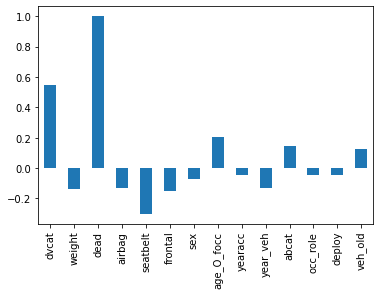

In [ ]:
df.corr()["dead"].plot(kind="bar")

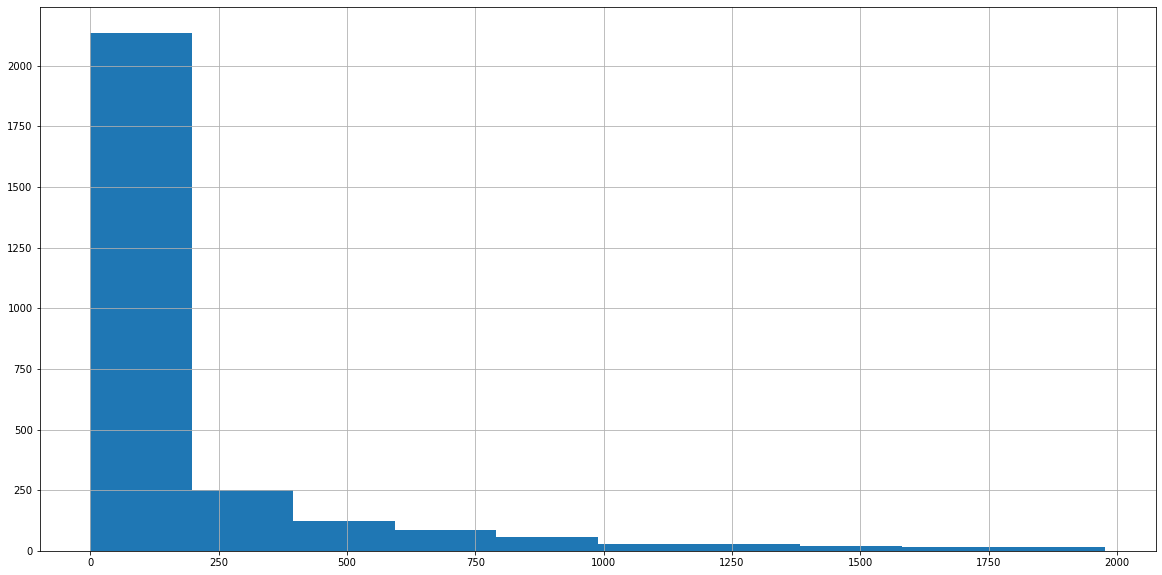

In [ ]:
from scipy.stats import norm
param = norm.fit(df["weight"])
df[df["weight"]<2000]["weight"].hist(figsize=(20, 10))

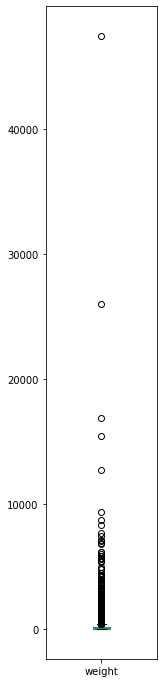

In [ ]:
df["weight"].plot.box(figsize=(2,12))

In [ ]:
df["weight"]=np.log(df["weight"]+0.01)

In [ ]:
df[(df["weight"] > 0) & (df["weight"]<1)]

,dvcat,weight,dead,airbag,seatbelt,frontal,sex,age_O_focc,yearacc,year_veh,abcat,occ_role,deploy,veh_old
id,,,,,,,,,,,,,,
494,62,0.009950,1,1,0,1,0,52,2002,1999,1,1,1,3
1018,17,0.064851,1,0,1,1,0,24,1999,1992,2,0,0,7
1239,32,0.858238,1,0,1,1,1,60,2001,1990,2,0,0,11
1285,17,0.009950,0,1,1,0,0,71,2002,2000,0,1,0,2
1532,62,0.880456,1,0,0,0,1,33,1997,1985,2,1,0,12
1785,32,0.009950,0,1,1,0,0,26,2002,1995,0,1,0,7
1875,62,0.009950,1,1,0,1,1,44,2002,2000,1,1,1,2
2030,62,0.447886,1,0,0,0,0,49,2002,1989,2,1,0,13


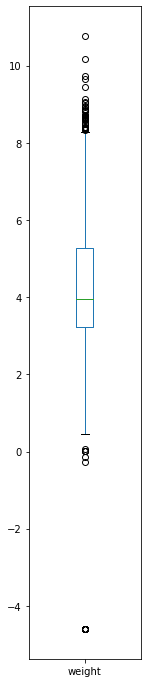

In [ ]:
df["weight"].plot.box(figsize=(2,12))

In [ ]:
df.head()

,dvcat,weight,dead,airbag,seatbelt,frontal,sex,age_O_focc,yearacc,year_veh,abcat,occ_role,deploy,veh_old
id,,,,,,,,,,,,,,
0,17,7.518023,0,0,1,1,1,19,2002,1993,2,1,0,9
1,32,3.002112,1,1,0,1,0,60,2002,1998,1,1,1,4
2,17,4.516328,0,1,1,1,1,30,1999,1996,1,1,1,3
3,32,4.158586,0,0,1,0,1,62,1998,1987,2,0,0,11
4,62,1.712175,1,1,1,1,1,19,1997,1996,1,0,1,1


In [ ]:
from sklearn.preprocessing import StandardScaler
df_std = df.copy()
col_names = ['weight', 'dvcat', 'yearacc', 'year_veh', 'age_O_focc', 'veh_old']
features = df_std[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
df_std[col_names] = features
df_std.head()

,dvcat,weight,dead,airbag,seatbelt,frontal,sex,age_O_focc,yearacc,year_veh,abcat,occ_role,deploy,veh_old
id,,,,,,,,,,,,,,
0,-0.971798,1.908209,0,0,1,1,1,-1.061735,1.435107,0.102232,2,1,0,0.339199
1,-0.060194,-0.704679,1,1,0,1,0,1.042849,1.435107,0.960840,1,1,1,-0.558736
2,-0.971798,0.171441,0,1,1,1,1,-0.497091,-0.298037,0.617397,1,1,1,-0.738323
3,-0.060194,-0.035547,0,0,1,0,1,1.145511,-0.875752,-0.928096,2,0,0,0.698372
4,1.763014,-1.451031,1,1,1,1,1,-1.061735,-1.453467,0.617397,1,0,1,-1.097497


In [ ]:
!pip install category_encoders

     |████████████████████████████████| 81kB 4.5MB/s 


In [ ]:

import category_encoders as ce

list_cols = ['abcat']
ce_ohe = ce.OneHotEncoder(cols=list_cols)
df_std_onehot = ce_ohe.fit_transform(df_std)
df_std_onehot.head()

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,dvcat,weight,dead,airbag,seatbelt,frontal,sex,age_O_focc,yearacc,year_veh,abcat_1,abcat_2,abcat_3,occ_role,deploy,veh_old
id,,,,,,,,,,,,,,,,
0,-0.971798,1.908209,0,0,1,1,1,-1.061735,1.435107,0.102232,1,0,0,1,0,0.339199
1,-0.060194,-0.704679,1,1,0,1,0,1.042849,1.435107,0.960840,0,1,0,1,1,-0.558736
2,-0.971798,0.171441,0,1,1,1,1,-0.497091,-0.298037,0.617397,0,1,0,1,1,-0.738323
3,-0.060194,-0.035547,0,0,1,0,1,1.145511,-0.875752,-0.928096,1,0,0,0,0,0.698372
4,1.763014,-1.451031,1,1,1,1,1,-1.061735,-1.453467,0.617397,0,1,0,0,1,-1.097497


In [ ]:
df_std_onehot.to_csv("output.csv")